# Temperature Forecast Project using ML
**Project Description**
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

**Attribute Information:**
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Data Link: https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

In [1]:
!pip install rasterio
!pip install folium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#analysis datatime
import datetime as dt
from datetime import datetime

import folium
import rasterio as rio
from folium import plugins
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder #OneHotEncoder

#Standardize the feature
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

#Classification Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [3]:
#Get dataset
temp_url = 'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv'
temp_df = pd.read_csv(temp_url)
temp_df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
temp_df.shape
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
#extract the  date object into day,month, year format
temp_df['Date'] = pd.to_datetime(temp_df['Date'])
temp_df['day'] = temp_df['Date'].dt.day
temp_df['month'] = temp_df['Date'].dt.month
temp_df['year'] = temp_df['Date'].dt.year
temp_df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0


In [6]:
temp_df.drop(['Date'],axis=1,inplace=True)

In [7]:
temp_df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
day                  2
month                2
year                 2
dtype: int64

In [8]:
temp_df.duplicated().sum()

0

In [9]:
temp_df.sample(5)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
754,5.0,29.6,23.7,58.063324,95.678978,29.617672,24.664148,7.315073,132.948405,0.765253,...,37.5507,127.135,35.038,0.5055,5438.163574,30.8,24.4,30.0,7.0,2013.0
1150,1.0,28.8,23.6,57.018826,94.938087,30.476346,25.482708,8.740919,74.960096,0.492442,...,37.6046,126.991,212.335,2.7850,5152.121094,29.1,23.5,15.0,8.0,2013.0
1745,21.0,32.9,22.0,55.014385,88.894501,29.963722,23.919464,5.947957,35.401047,0.219508,...,37.5507,127.040,26.298,0.5721,5809.657715,29.1,23.0,7.0,7.0,2014.0
334,10.0,25.3,22.8,86.788910,96.972374,25.512805,23.944869,11.764173,42.276439,0.863076,...,37.4562,126.955,208.507,5.1782,5764.948242,25.4,22.9,13.0,7.0,2013.0
4736,12.0,25.4,19.9,62.647152,94.721397,24.590816,19.653887,11.358936,62.148891,0.306136,...,37.5507,126.988,132.118,0.5931,5899.087402,22.6,18.9,7.0,3.0,2016.0


In [10]:
temp_df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,16.370968,7.080645,2015.000000
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613,8.241331,2.238364,1.414305
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


In [11]:
#Im using mean to filling the missing values
temp_df.fillna(temp_df.mean(),inplace=True)

In [12]:
temp_df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day                 0
month               0
year                0
dtype: int64

In [13]:
temp_df.shape

(7752, 27)

In [14]:
temp_df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,16.370968,7.080645,2015.000000
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276,8.240268,2.238075,1.414122
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


In [15]:
#correlation matrix

corr_matrix = temp_df.corr()
corr_matrix

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
station,1.000000e+00,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.006919,...,-2.375015e-01,-1.187044e-01,-2.558297e-01,-9.006090e-02,-0.019001,0.107983,0.128293,3.184397e-17,-2.341773e-17,1.435563e-15
Present_Tmax,1.126554e-01,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,...,-5.261489e-02,9.019776e-03,-1.871206e-01,-1.058092e-01,-0.025439,0.610348,0.622741,-1.438070e-01,-1.150750e-03,5.980007e-02
Present_Tmin,1.316462e-01,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,...,-7.847529e-02,-4.346122e-02,-2.502747e-01,-1.463390e-01,0.053578,0.471806,0.796670,-1.082721e-01,-3.434226e-03,3.739568e-02
LDAPS_RHmin,-6.673316e-02,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,8.709887e-02,-7.623712e-02,1.021149e-01,1.237439e-01,0.244080,-0.437898,0.095019,-6.583711e-02,-5.394021e-02,-2.044507e-03
LDAPS_RHmax,-1.669845e-01,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,1.957977e-01,2.566694e-02,1.771681e-01,2.195989e-01,0.149261,-0.283738,-0.071997,-1.300684e-02,-3.998985e-02,-1.418320e-01
LDAPS_Tmax_lapse,6.910718e-02,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-4.209291e-02,9.066575e-02,-1.788954e-01,-1.623324e-01,0.047971,0.827189,0.586868,-1.603214e-01,-2.168992e-02,1.617217e-02
LDAPS_Tmin_lapse,1.047582e-01,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,-9.625683e-02,-2.670103e-02,-1.954553e-01,-1.858487e-01,0.159975,0.586983,0.880176,-1.779545e-01,-2.749581e-02,-4.693413e-03
LDAPS_WS,5.277000e-03,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,3.665702e-02,-5.946615e-02,1.910530e-01,1.716286e-01,0.121759,-0.342729,-0.096576,-2.913467e-02,-8.128770e-02,-1.113577e-01
LDAPS_LH,-1.333566e-01,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,1.332208e-01,2.582205e-02,5.513344e-02,8.678088e-02,-0.047384,0.157616,-0.055440,-1.209485e-02,-2.274775e-02,5.707733e-02
LDAPS_CC1,6.918787e-03,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,-8.130615e-03,-6.842827e-03,-1.409033e-02,-2.075199e-02,0.218309,-0.452541,-0.011028,-2.013716e-02,-7.627189e-02,-6.647797e-02


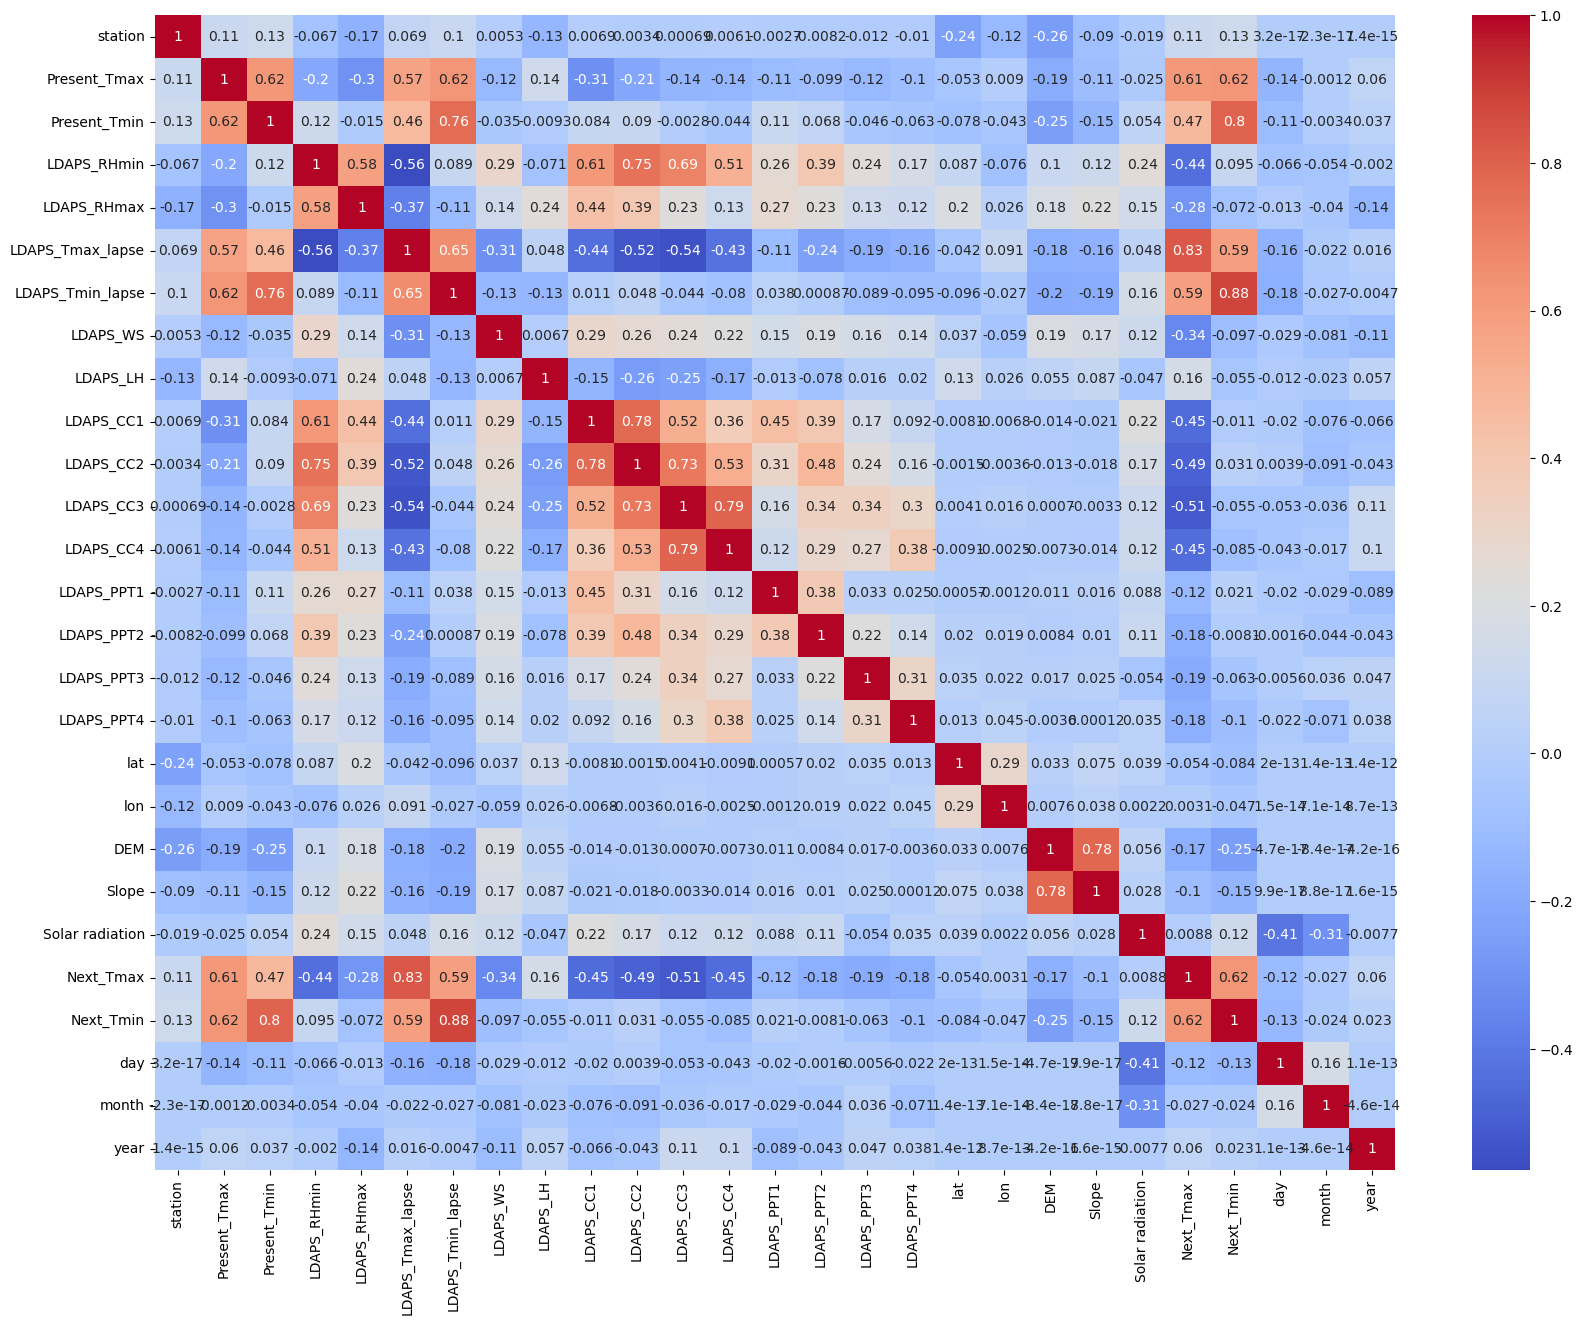

In [16]:
corr_matrix = temp_df.corr()

#plotting the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot= True,cmap = 'coolwarm')
plt.title = 'Correlation Matrix'
plt.show()

In [17]:
temp_df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year'],
      dtype='object')

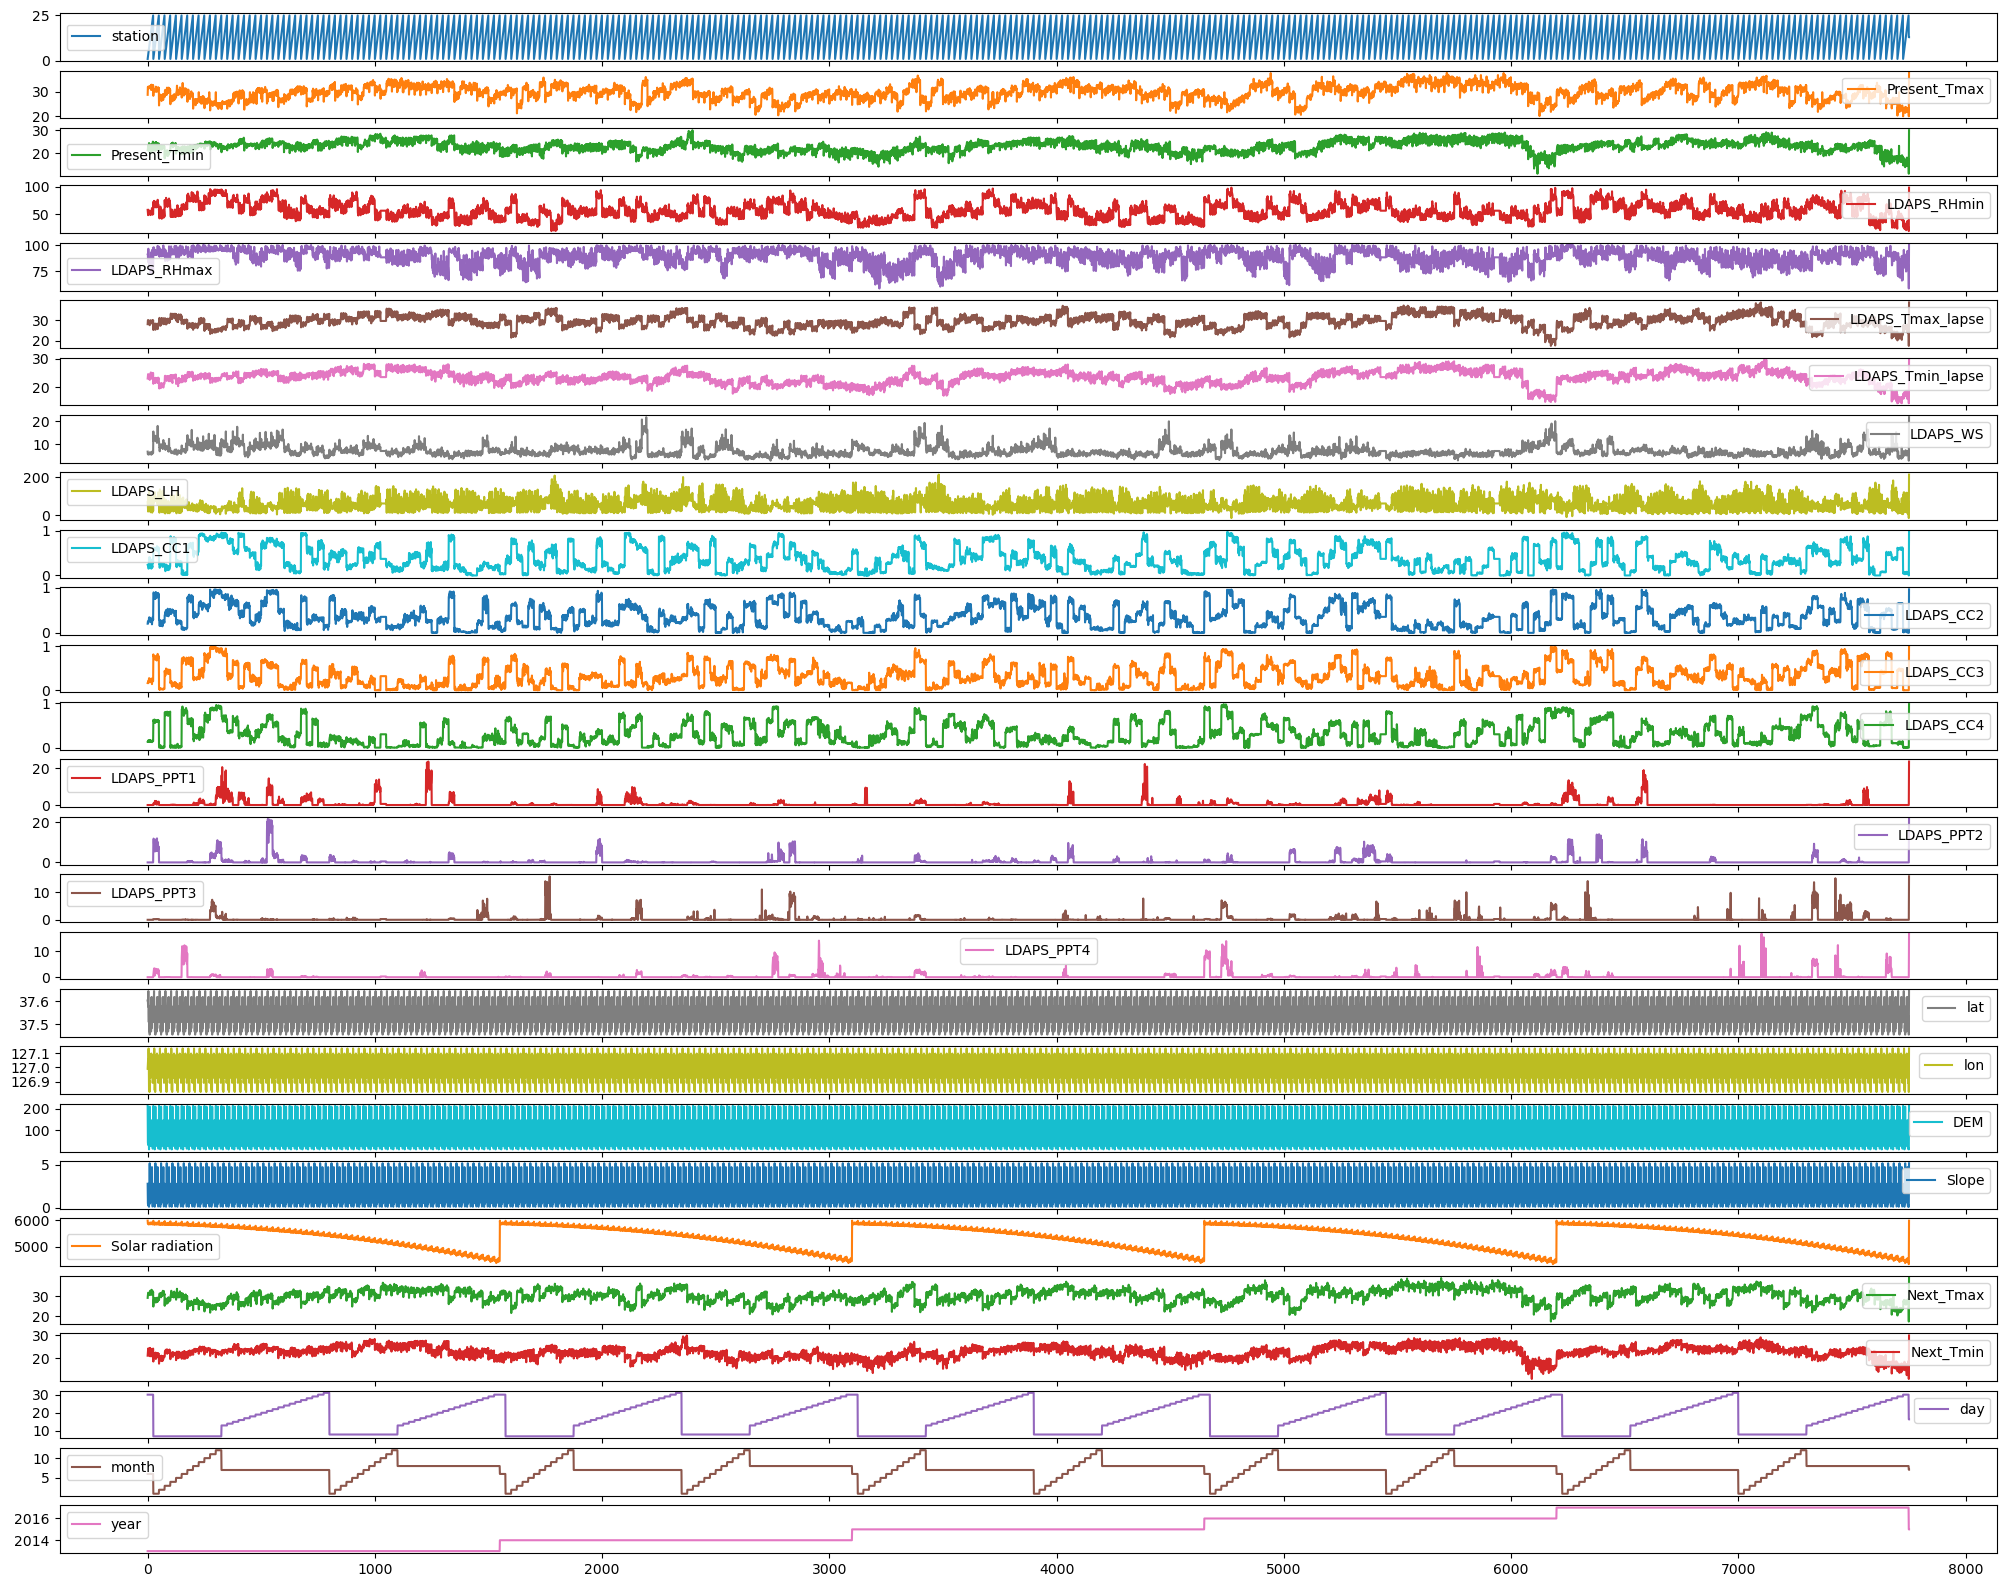

In [18]:
#ploting all the column values
temp_df.plot(subplots=True,figsize=(25,20))
plt.show()

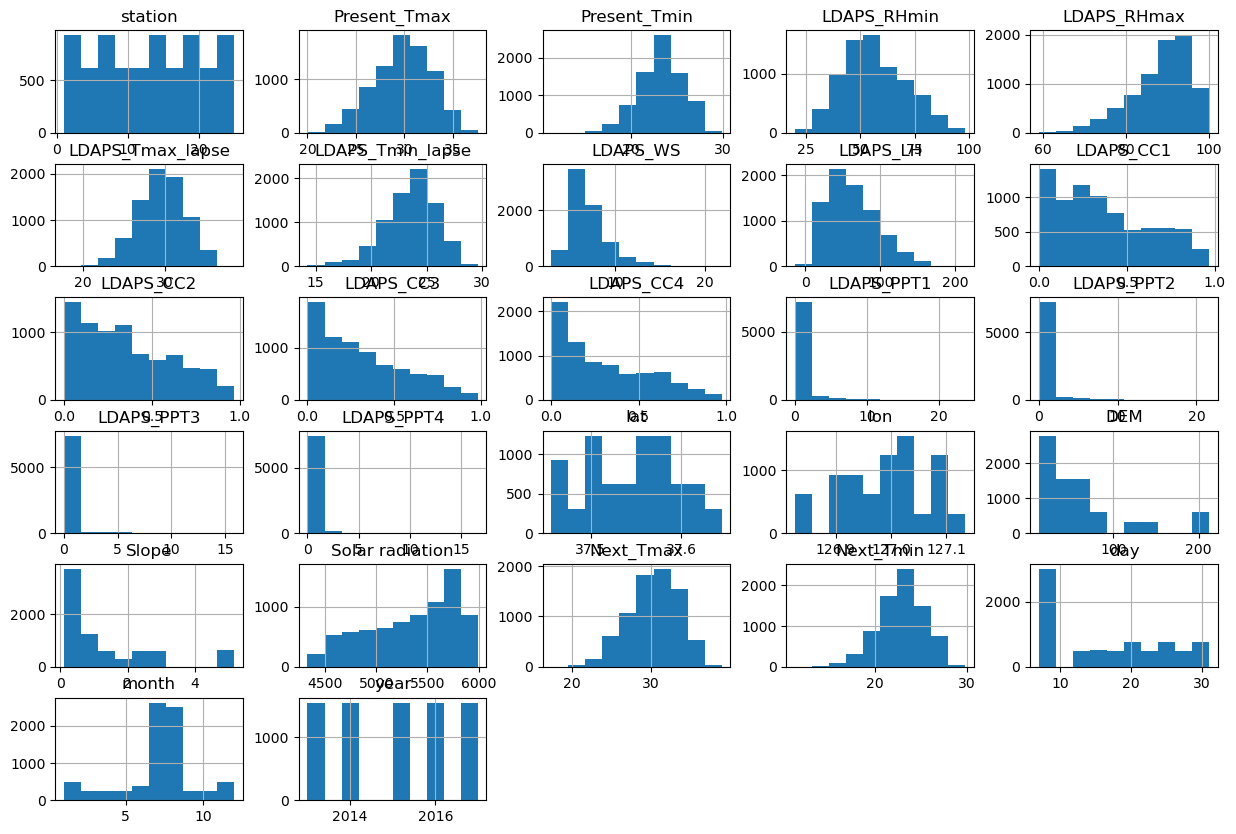

In [19]:
#temperature Hist plot

temp_df.hist(figsize=(15,10))
plt.show()

In [20]:
#check the skewness
skew_df = temp_df.skew()
skew_df

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
day                 0.245514
month              -0.705332
year                0.000000
dtype: float64

In [21]:
#Log transformation of the data
#plan to redusing the positive skewness

skewness_colums = ['LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2',
                   'LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1',
                   'LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']
for col in skewness_colums:
  temp_df[col] = np.log(temp_df[col]+1)

In [22]:
#after log transformation skewness

skew_df = temp_df.skew()
skew_df

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.683729
LDAPS_LH           -0.629556
LDAPS_CC1           0.211677
LDAPS_CC2           0.214252
LDAPS_CC3           0.384927
LDAPS_CC4           0.440554
LDAPS_PPT1          2.741574
LDAPS_PPT2          3.171648
LDAPS_PPT3          3.995810
LDAPS_PPT4          4.211296
lat                 0.087062
lon                -0.285213
DEM                 0.443730
Slope               0.836131
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
day                 0.245514
month              -0.705332
year                0.000000
dtype: float64

In [23]:
#applying Box_cox  transsfermation
from scipy.stats import boxcox

boxcox_colums = ['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
for col in boxcox_colums:
  temp_df[col], _= boxcox(temp_df[col]+1)

In [24]:
skew_df = temp_df.skew()
skew_df

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.683729
LDAPS_LH           -0.629556
LDAPS_CC1           0.211677
LDAPS_CC2           0.214252
LDAPS_CC3           0.384927
LDAPS_CC4           0.440554
LDAPS_PPT1          1.289973
LDAPS_PPT2          1.449968
LDAPS_PPT3          1.612896
LDAPS_PPT4          1.843460
lat                 0.087062
lon                -0.285213
DEM                 0.443730
Slope               0.836131
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
day                 0.245514
month              -0.705332
year                0.000000
dtype: float64

In [25]:
tem_compar = temp_df.copy()

In [26]:
compare_tem = tem_compar.loc['2013': '2017']
compare_tem

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
2013,14.0,30.3,21.3,49.731800,88.636070,31.729709,24.347510,2.046168,2.661527,0.252664,...,37.4967,126.927,3.464735,0.481191,5670.201660,30.2,24.1,18.0,7.0,2014.0
2014,15.0,31.0,21.8,50.506107,89.497932,31.693743,24.335106,2.107887,3.258491,0.241660,...,37.5507,126.937,3.435483,0.617993,5681.875000,30.5,23.8,18.0,7.0,2014.0
2015,16.0,29.7,20.5,53.281841,94.686729,30.777578,23.668570,2.103149,4.412104,0.264329,...,37.4697,126.995,4.422343,1.181083,5665.889160,29.4,22.4,18.0,7.0,2014.0
2016,17.0,30.6,22.8,49.490707,93.281166,32.323609,23.876724,1.962173,4.633161,0.201731,...,37.6181,127.099,3.997672,0.528862,5684.806641,31.0,22.8,18.0,7.0,2014.0
2017,18.0,31.3,21.7,51.621449,91.547768,31.312566,24.069737,2.117610,4.448599,0.247640,...,37.4832,127.024,4.050824,0.802584,5674.166992,31.1,24.8,18.0,7.0,2014.0


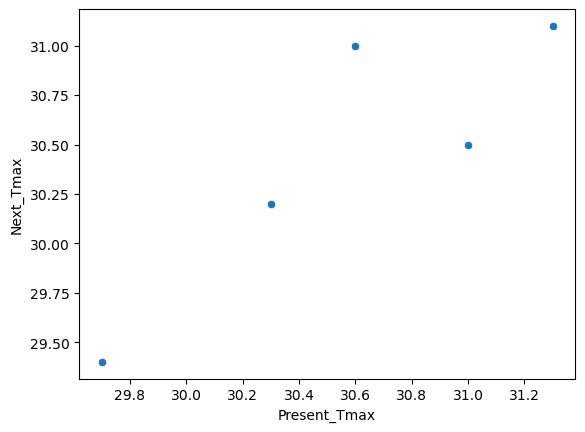

In [27]:
#scatter plot
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data=compare_tem)
plt.show()

In [28]:
#split the data
features  = temp_df.drop(['Next_Tmax','Next_Tmin'],axis=1)
target_max = temp_df['Next_Tmax']
target_min = temp_df['Next_Tmin']

In [29]:
missing_val = features.isnull().sum()
missing_val

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            4
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
day                 0
month               0
year                0
dtype: int64

In [30]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
features = imputer.fit_transform(features)

In [31]:
#Splitting the data

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error


X_train_max,X_test_max,y_train_max,y_test_max = train_test_split(features,target_max,test_size=0.2,random_state=42)
X_train_min,X_test_min,y_train_min,y_test_min = train_test_split(features,target_min,test_size=0.2,random_state=42)

In [32]:
#scalling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_max = scaler.fit_transform(X_train_max)
X_test_max = scaler.transform(X_test_max)

X_train_min = scaler.fit_transform(X_train_min)
X_test_min = scaler.transform(X_test_min)

In [33]:
#model building  for Max

models = [LinearRegression(),
          Ridge(alpha = 0.001),
          Lasso(alpha=0.003),
          SVR(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          AdaBoostRegressor(base_estimator=LinearRegression())]

model_names = ['LinearRegression','Ridge','Lasso','SVR','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor']
tmp_model_df = pd.DataFrame(columns = ['Model_name','MSE','R2', 'MeanCV'])
for model,model_names in zip(models,model_names):
  model.fit(X_train_max,y_train_max)
  pred = model.predict(X_test_max)
  mse = mean_squared_error(y_test_max,pred)
  r2 = r2_score(y_test_max,pred)
  mean_cv = cross_val_score(model,X_train_max,y_train_max,cv=5).mean()
  tmp_model_df = pd.concat([tmp_model_df,pd.DataFrame({'Model_name':[model_names],'MSE':[mse],'R2':[r2],'MeanCV':[mean_cv]})],ignore_index=True)
tmp_model_df

,Model_name,MSE,R2,MeanCV
0,LinearRegression,2.289160,0.765620,0.761978
1,Ridge,2.289160,0.765620,0.761978
2,Lasso,2.291955,0.765334,0.762073
3,SVR,1.008669,0.896725,0.876839
4,DecisionTreeRegressor,2.205914,0.774143,0.749645
5,RandomForestRegressor,0.811241,0.916940,0.897007
6,GradientBoostingRegressor,1.358926,0.860864,0.850937
7,AdaBoostRegressor,2.421530,0.752067,0.748473


In [34]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state = 42)
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3,scoring = 'neg_mean_squared_error',verbose =2,n_jobs= -1)
grid_search.fit(X_train_max, y_train_max)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [36]:
#Best parameters and model :
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model: RandomForestRegressor(n_estimators=200, random_state=42)


In [37]:
#deploy best_model using best parameters

rf_model_best = RandomForestRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rf_model_best.fit(X_train_max,y_train_max)
pred_best = rf_model_best.predict(X_test_max)

mse_max = mean_squared_error(y_test_max,pred_best)
r2_max = r2_score(y_test_max,pred_best)

print("MSE:", mse_max)
print("R2:", r2_max)

MSE: 0.8222624305414209
R2: 0.9158110807114923


In [38]:
#model building  for Min

models_min = [LinearRegression(),
            Ridge(alpha = 0.001),
            Lasso(alpha=0.003),
            SVR(),
            DecisionTreeRegressor(),
            RandomForestRegressor(),
            GradientBoostingRegressor(),
            AdaBoostRegressor(base_estimator=LinearRegression())]

model_names_min = ['LinearRegression','Ridge','Lasso','SVR','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor']

tmp_model_df = pd.DataFrame(columns = ['MSE','R2', 'MeanCV'])

for model,model_names_min in zip(models_min,model_names_min):
  model.fit(X_train_min,y_train_min)
  pred_min = model.predict(X_test_min)
  mse = mean_squared_error(y_test_min,pred_min)
  r2 = r2_score(y_test_min,pred_min)
  mean_cv = cross_val_score(model,X_train_min,y_train_min,cv=5).mean()
  tmp_model_df = pd.concat([tmp_model_df,pd.DataFrame({'model_names':[model_names_min],'MSE':[mse],'R2':[r2],'MeanCV':[mean_cv]})],ignore_index=True)
tmp_model_df

,MSE,R2,MeanCV,model_names
0,0.957150,0.846405,0.825445,LinearRegression
1,0.957150,0.846405,0.825445,Ridge
2,0.955851,0.846613,0.825391,Lasso
3,0.480736,0.922856,0.907448,SVR
4,1.419702,0.772178,0.771787,DecisionTreeRegressor
5,0.563728,0.909538,0.899093,RandomForestRegressor
6,0.646618,0.896236,0.882797,GradientBoostingRegressor
7,1.001150,0.839344,0.816712,AdaBoostRegressor


In [39]:
#for SVR model :
#Parameter grid for SVR

param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 1]

}

svr =SVR()
grid_search = GridSearchCV(estimator=svr,param_grid=param_grid,cv=3,n_jobs=-1, verbose=2,scoring= 'neg_mean_squared_error')

grid_search.fit(X_train_min,y_train_min)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [40]:
best_params = grid_search.best_params_
print(f'Best parameters :{best_params}')

Best parameters :{'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


In [41]:
#Best SVR
svr_best  = SVR(C = 10, epsilon =  0.1, gamma = 'scale', kernel = 'rbf')
svr_best.fit(X_train_min,y_train_min)

y_train_min_pred = svr_best.predict(X_train_min)
y_test_pred = svr_best.predict(X_test_min)


print(y_train_min_pred)
print(y_test_pred)

[23.50017334 18.8003079  23.0002318  ... 25.89977584 19.7001025
 23.86913244]
[20.75790142 27.53043463 21.16385236 ... 22.26450252 19.59629357
 21.57737674]


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_train = mean_squared_error(y_train_min,y_train_min_pred)
mae_train = mean_squared_error(y_train_min,y_train_min_pred)
r2_train_test = r2_score(y_train_min,y_train_min_pred)


mse_test = mean_squared_error(y_test_min,y_test_pred)
mae_test = mean_squared_error(y_test_min,y_test_pred)
r2_test = r2_score(y_test_min,y_test_pred)

print(f'MSE_train : {mse_train}')
print(f'MAE_train : {mae_train}')
print(f'R2_train : {r2_train_test}')

print(f'MSE_test : {mse_test}')
print(f'MAE_test : {mae_test}')
print(f'R2_test : {r2_test}')

MSE_train : 0.10160738218798394
MAE_train : 0.10160738218798394
R2_train : 0.9834768128197277
MSE_test : 0.30680067903244757
MAE_test : 0.30680067903244757
R2_test : 0.9507672628576456


In [43]:
import joblib
joblib.dump(svr_best,'svr_model.pkl')

['svr_model.pkl']